In [1]:
!pip install matplotlib
!pip install pytorch_lightning

  Obtaining dependency information for matplotlib from https://files.pythonhosted.org/packages/16/51/58b0b9de42fe1e665736d9286f88b5f1556a0e22bed8a71f468231761083/matplotlib-3.7.5-cp38-cp38-win_amd64.whl.metadata
  Using cached matplotlib-3.7.5-cp38-cp38-win_amd64.whl.metadata (5.8 kB)
  Obtaining dependency information for contourpy>=1.0.1 from https://files.pythonhosted.org/packages/96/1b/b05cd42c8d21767a0488b883b38658fb9a45f86c293b7b42521a8113dc5d/contourpy-1.1.1-cp38-cp38-win_amd64.whl.metadata
  Using cached contourpy-1.1.1-cp38-cp38-win_amd64.whl.metadata (5.9 kB)
  Obtaining dependency information for cycler>=0.10 from https://files.pythonhosted.org/packages/e7/05/c19819d5e3d95294a6f5947fb9b9629efb316b96de511b418c53d245aae6/cycler-0.12.1-py3-none-any.whl.metadata
  Using cached cycler-0.12.1-py3-none-any.whl.metadata (3.8 kB)
  Obtaining dependency information for fonttools>=4.22.0 from https://files.pythonhosted.org/packages/d7/7e/9cf848acabb9cfa0c9250103c470e30b68afb0f036d67f7f


[notice] A new release of pip is available: 23.2.1 -> 24.0
[notice] To update, run: python.exe -m pip install --upgrade pip


  Obtaining dependency information for pytorch_lightning from https://files.pythonhosted.org/packages/e9/3c/8d05e269011d43c35b1fb3baca8d88bac6668f6c4bde565ad9ed27000b22/pytorch_lightning-2.2.2-py3-none-any.whl.metadata
  Obtaining dependency information for torchmetrics>=0.7.0 from https://files.pythonhosted.org/packages/f3/0e/cedcb9c8aeb2d1f655f8d05f841b14d84b0a68d9f31afae4af55c7c6d0a9/torchmetrics-1.3.2-py3-none-any.whl.metadata
  Obtaining dependency information for lightning-utilities>=0.8.0 from https://files.pythonhosted.org/packages/5e/9e/e7768a8e363fc6f0c978bb7a0aa7641f10d80be60000e788ef2f01d34a7c/lightning_utilities-0.11.2-py3-none-any.whl.metadata
  Obtaining dependency information for aiohttp!=4.0.0a0,!=4.0.0a1 from https://files.pythonhosted.org/packages/c5/2b/e7260c532ea3057dfdee64d84e9860ed1e84cf54b775ece475d560382d1f/aiohttp-3.9.5-cp38-cp38-win_amd64.whl.metadata
  Obtaining dependency information for aiosignal>=1.1.2 from https://files.pythonhosted.org/packages/76/ac/a7


[notice] A new release of pip is available: 23.2.1 -> 24.0
[notice] To update, run: python.exe -m pip install --upgrade pip


In [73]:
import os
import torch
from torch.utils.data import Dataset
import matplotlib.pyplot as plt
import torchvision
import pytorch_lightning as pl
import segmentation_models_pytorch as smp
import random
from PIL import Image

In [99]:
from pprint import pprint
from torch.utils.data import DataLoader
import numpy as np

from segmentation_models_pytorch import utils

In [34]:
curr_path = os.getcwd()
train_path = os.path.join(curr_path, 'forests\\train')
val_path = os.path.join(curr_path, 'forests\\val')

train_imgs = [f for f in os.listdir(os.path.join(train_path, 'images')) if f.endswith('.jpg') or f.endswith('.png')]
train_masks = [f for f in os.listdir(os.path.join(train_path, 'masks')) if f.endswith('.jpg') or f.endswith('.png')]
val_imgs = [f for f in os.listdir(os.path.join(val_path, 'images')) if f.endswith('.jpg') or f.endswith('.png')]
val_masks = [f for f in os.listdir(os.path.join(val_path, 'masks')) if f.endswith('.jpg') or f.endswith('.png')]

In [35]:
print(f"Train Images: {len(train_imgs)}")
print(f"Train Masks: {len(train_masks)}")

Train Images: 269
Train Masks: 269


In [54]:
sample_img = os.path.join(train_path, 'images', train_imgs[101])
sample_mask = os.path.join(train_path, 'masks', train_masks[101])

D:\Masters\OVGU\VII_Semester\Thesis\segmentation_models.pytorch\forests\train\images\output_4096_4096.png
D:\Masters\OVGU\VII_Semester\Thesis\segmentation_models.pytorch\forests\train\masks\output_4096_4096.png


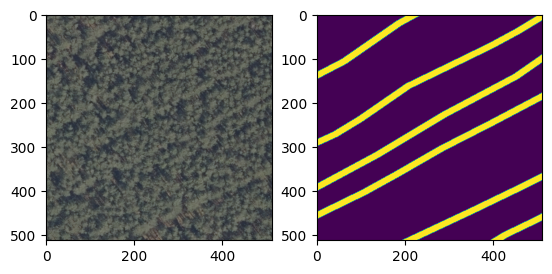

In [56]:
image = Image.open(sample_img)
mask = Image.open(sample_mask)

plt.subplot(1,2,1)
plt.imshow(image) # for visualization we have to transpose back to HWC
plt.subplot(1,2,2)
plt.imshow(mask)  # for visualization we have to remove 3rd dimension of mask
plt.show()

In [82]:
class SegmentationDataset(Dataset):
    def __init__(self, root_dir):
        self.root_dir = root_dir
        self.image_folder = os.path.join(root_dir, 'images')
        self.mask_folder = os.path.join(root_dir, 'masks')
        self.image_files = os.listdir(self.image_folder)

    def __len__(self):
        return len(self.image_files)

    def __getitem__(self, idx):
        img_name = self.image_files[idx]
        img_path = os.path.join(self.image_folder, img_name)
        mask_name = self.image_files[idx]
        mask_path = os.path.join(self.mask_folder, mask_name)

        # Load image and mask
        image = Image.open(img_path)
        mask = Image.open(mask_path)

        # Convert to tensors (optional)
        transform = torchvision.transforms.ToTensor()
        image = transform(image)
        mask = transform(mask)

        return image, mask


In [83]:
train_dataset = SegmentationDataset(train_path)
val_dataset = SegmentationDataset(val_path)

In [84]:
#n_cpu = os.cpu_count()
train_dataloader = DataLoader(train_dataset, batch_size=16, shuffle=True, num_workers=0)
val_dataloader = DataLoader(val_dataset, batch_size=16, shuffle=False, num_workers=0)

In [85]:
for images, masks in train_dataloader:
    # Do something with each batch of images and masks
    print(images.shape)  # Shape of the batch of images
    print(masks.shape)

torch.Size([16, 3, 512, 512])
torch.Size([16, 1, 512, 512])
torch.Size([16, 3, 512, 512])
torch.Size([16, 1, 512, 512])
torch.Size([16, 3, 512, 512])
torch.Size([16, 1, 512, 512])
torch.Size([16, 3, 512, 512])
torch.Size([16, 1, 512, 512])
torch.Size([16, 3, 512, 512])
torch.Size([16, 1, 512, 512])
torch.Size([16, 3, 512, 512])
torch.Size([16, 1, 512, 512])
torch.Size([16, 3, 512, 512])
torch.Size([16, 1, 512, 512])
torch.Size([16, 3, 512, 512])
torch.Size([16, 1, 512, 512])
torch.Size([16, 3, 512, 512])
torch.Size([16, 1, 512, 512])
torch.Size([16, 3, 512, 512])
torch.Size([16, 1, 512, 512])
torch.Size([16, 3, 512, 512])
torch.Size([16, 1, 512, 512])
torch.Size([16, 3, 512, 512])
torch.Size([16, 1, 512, 512])
torch.Size([16, 3, 512, 512])
torch.Size([16, 1, 512, 512])
torch.Size([16, 3, 512, 512])
torch.Size([16, 1, 512, 512])
torch.Size([16, 3, 512, 512])
torch.Size([16, 1, 512, 512])
torch.Size([16, 3, 512, 512])
torch.Size([16, 1, 512, 512])
torch.Size([13, 3, 512, 512])
torch.Size

In [95]:
ENCODER = 'resnet18'
ENCODER_WEIGHTS = 'imagenet'
CLASSES = 1
ACTIVATION = 'sigmoid' # could be None for logits or 'softmax2d' for multiclass segmentation

# create segmentation model with pretrained encoder
model = smp.DeepLabV3Plus(
    encoder_name=ENCODER, 
    encoder_weights=ENCODER_WEIGHTS, 
    classes=CLASSES, 
    activation=ACTIVATION,
)

In [96]:
loss = smp.utils.losses.BCELoss()
metrics = [smp.utils.metrics.IoU(threshold=0.5)]
optimizer = torch.optim.Adam(model.parameters(), lr=1e-4)

In [97]:
train_epoch = smp.utils.train.TrainEpoch(
    model, 
    loss=loss, 
    metrics=metrics, 
    optimizer=optimizer,
    verbose=True,
)

valid_epoch = smp.utils.train.ValidEpoch(
    model, 
    loss=loss, 
    metrics=metrics,
    verbose=True,
)

In [100]:
max_score=0


for i in range(0, 1):
    
    print('\nEpoch: {}'.format(i))
    train_logs = train_epoch.run(train_dataloader)
    valid_logs = valid_epoch.run(val_dataloader)
    
    # do something (save model, change lr, etc.)
    torch.save(model, './best_model.pth')
    print('Model saved!')
        
    if i == 25:
        optimizer.param_groups[0]['lr'] = 1e-5
        print('Decrease decoder learning rate to 1e-5!')


Epoch: 0
valid: 100%|██████████| 6/6 [00:22<00:00,  3.79s/it, bce_loss - 0.4994, iou_score - 0.02143] 
Model saved!


In [101]:
best_model = torch.load(os.path.join(os.getcwd(), 'best_model.pth'))

In [102]:
# helper function for data visualization
def visualize(**images):
    """PLot images in one row."""
    n = len(images)
    plt.figure(figsize=(16, 5))
    for i, (name, image) in enumerate(images.items()):
        plt.subplot(1, n, i + 1)
        plt.xticks([])
        plt.yticks([])
        plt.title(' '.join(name.split('_')).title())
        plt.imshow(image)
    plt.show()

torch.Size([512, 512, 3])


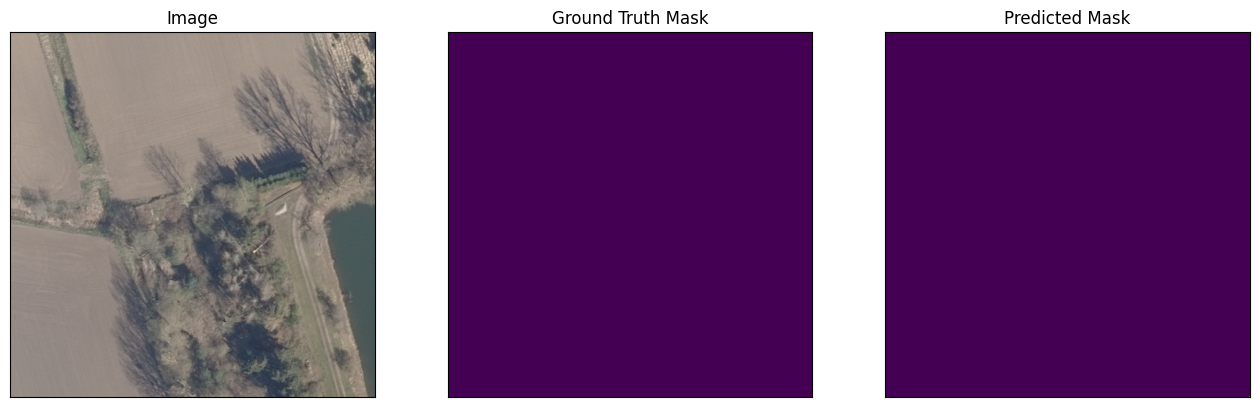

torch.Size([512, 512, 3])


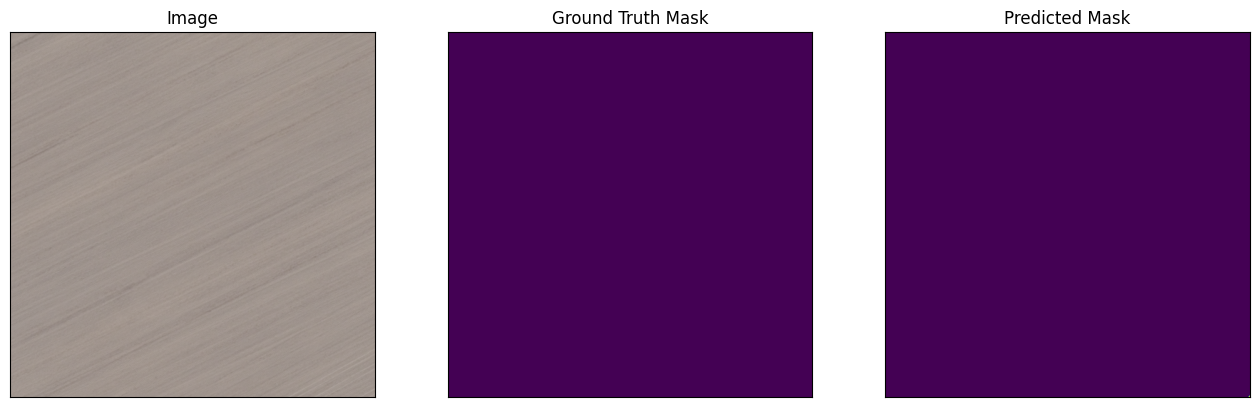

torch.Size([512, 512, 3])


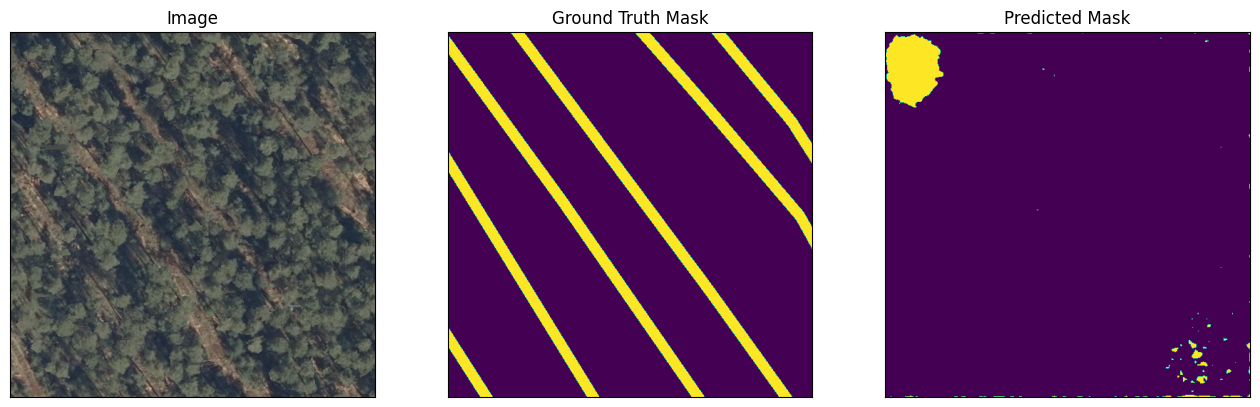

torch.Size([512, 512, 3])


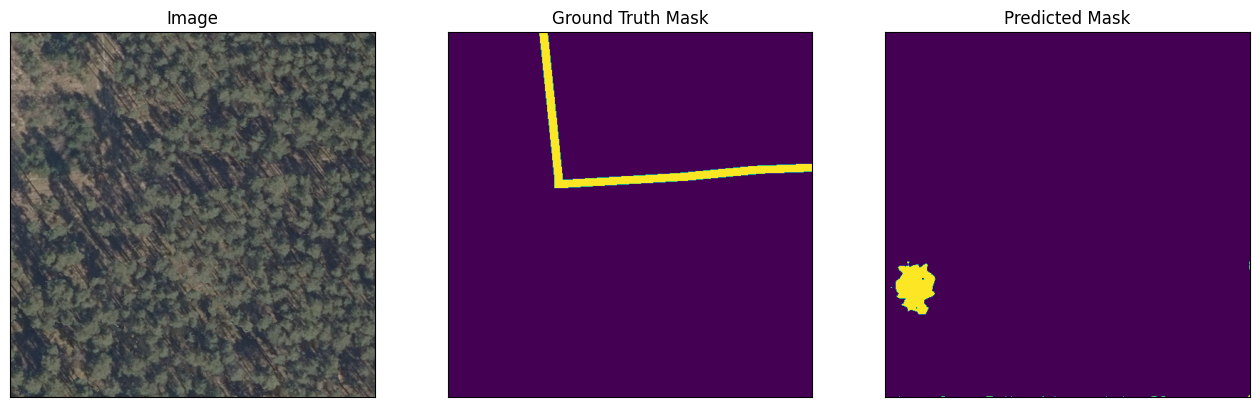

torch.Size([512, 512, 3])


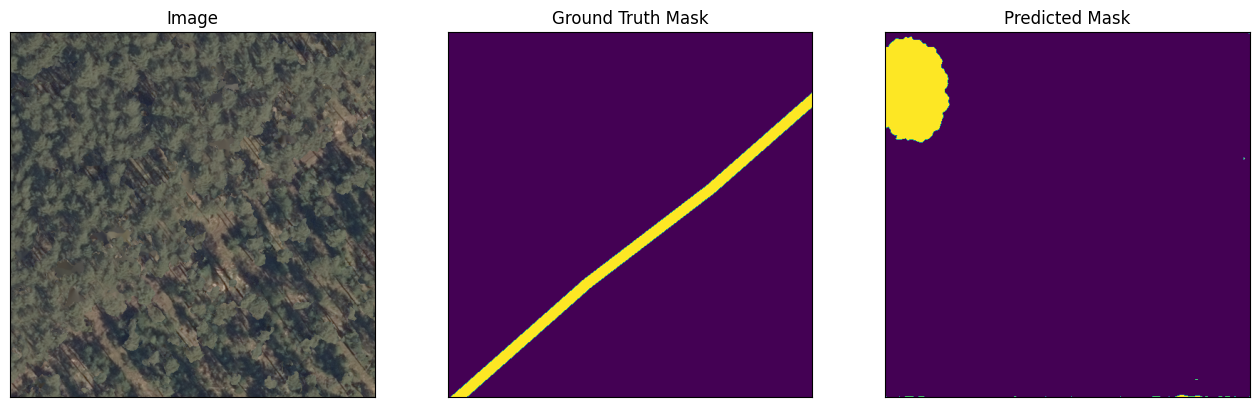

In [116]:
for i in range(5):
    n = np.random.choice(len(val_dataset))
    
    #image_vis = val_dataset[n][0].astype('uint8')
    image, gt_mask = val_dataset[n]
    image_vis = image.permute(1,2,0)
    print(image_vis.shape)
    
    gt_mask = gt_mask.squeeze()
    
    x_tensor = image.unsqueeze(0)
    pr_mask = best_model.predict(x_tensor)
    pr_mask = (pr_mask.squeeze().cpu().numpy().round())
        
    visualize(
        image=image_vis, 
        ground_truth_mask=gt_mask, 
        predicted_mask=pr_mask
    )

In [117]:
if torch.cuda.is_available():
    print("CUDA is available. You can use GPUs with PyTorch.")
else:
    print("CUDA is not available. You can only use CPU with PyTorch.")


CUDA is not available. You can only use CPU with PyTorch.
